# Пирмеры: Геометрические характеристики бинарных изображений

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('cat.jpg',0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0] # создание массива точек контура

### Площадь, ограниченная контуром

In [3]:
area = cv2.contourArea(cnt)
area

398701.0

### Длина контурного периметра

In [4]:
cv2.arcLength(cnt, 1)

2596.0

### Моменты

In [5]:
cv2.moments(cnt)

{'m00': 398701.0,
 'm10': 159281049.5,
 'm01': 99475899.5,
 'm20': 84843705700.33333,
 'm11': 39740621850.25,
 'm02': 33092315900.333332,
 'm30': 50842590640924.75,
 'm21': 21168504572233.168,
 'm12': 13220380202183.166,
 'm03': 12384799225699.75,
 'mu20': 21210926425.08333,
 'mu11': 0.0,
 'mu02': 8273078975.083332,
 'mu30': 0.0078125,
 'mu21': 0.0029296875,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.1334335337341349,
 'nu11': 0.0,
 'nu02': 0.05204422194409678,
 'nu30': 7.783442438824534e-17,
 'nu21': 2.9187909145592e-17,
 'nu12': 0.0,
 'nu03': 0.0}

### Отношение ширины к высоте ограничивающего прямоугольника

In [6]:
x, y, w, h = cv2.boundingRect(cnt)
float(w)/h

1.6

### Отношение площади контура к площади ограничивающего прямоугольника

In [7]:
arr = w * h
ar = cv2.contourArea(cnt)
extent = float(arr) / ar
extent

1.003258080616803

### Эквивалентный диаметр

In [8]:
ar = cv2.contourArea(cnt)
eqdiam = np.sqrt(4*ar / np.pi)
eqdiam

712.4899155254438

## Задание 1

Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.


In [9]:
img = cv2.imread('cat.jpg', 0)
imag = cv2.imread('cat.jpg', 0)

In [10]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

# Создание контура
cnt = contours[0]

In [11]:
# Вычисление площади
ar = cv2.contourArea(cnt)
print("Площадь: ", ar)

Площадь:  398701.0


In [12]:
# Вычисление периметра
prm = cv2.arcLength(cnt, True)
print("Периметра: ", prm)

Периметра:  2596.0


In [13]:
# Вычисление моментов
M = cv2.moments(cnt)
print("Моменты: ", M)

Моменты:  {'m00': 398701.0, 'm10': 159281049.5, 'm01': 99475899.5, 'm20': 84843705700.33333, 'm11': 39740621850.25, 'm02': 33092315900.333332, 'm30': 50842590640924.75, 'm21': 21168504572233.168, 'm12': 13220380202183.166, 'm03': 12384799225699.75, 'mu20': 21210926425.08333, 'mu11': 0.0, 'mu02': 8273078975.083332, 'mu30': 0.0078125, 'mu21': 0.0029296875, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.1334335337341349, 'nu11': 0.0, 'nu02': 0.05204422194409678, 'nu30': 7.783442438824534e-17, 'nu21': 2.9187909145592e-17, 'nu12': 0.0, 'nu03': 0.0}


In [14]:
x, y, w, h = cv2.boundingRect(cnt)
print("x, y, w, h: ", x, y, w, h)

x, y, w, h:  0 0 800 500


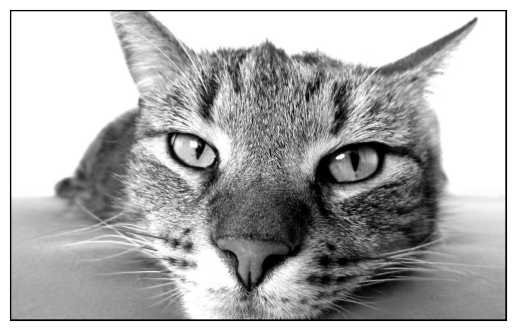

In [15]:
imag = cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
asprat = float(w) / h # соотношение сторон
rectar = w * h
extent = float(ar) / rectar
eqdiam = np.sqrt(4*ar / np.pi)

print("Ширина: ", w, ", Высота: ", h)
print("Отношение ширины к высоте: ", asprat)
print("Отношение s/(wh): ", extent)
print("Эквивалентный диаметр: ", eqdiam)

Ширина:  800 , Высота:  500
Отношение ширины к высоте:  1.6
Отношение s/(wh):  0.9967525
Эквивалентный диаметр:  712.4899155254438


# 2. Характерные параметры бинарных изображений

### Маска и пиксельные точки

In [17]:
img = cv2.imread("cat.jpg", 0)
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoints = np.transpose(np.nonzero(mask))
pixpoints = cv2.findNonZero(mask)

### Максимальное и минимальное значения и их координаты

In [18]:
minval, maxval, minloc, maxloc = cv2.minMaxLoc(img, mask=mask)

print(minval, maxval, minloc, maxloc)

0.0 255.0 (481, 137) (0, 0)


### Крайние точки

In [19]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost, rightmost, topmost, bottommost)

(0, 0) (799, 0) (0, 0) (799, 499)


### Средняя интенсивность

In [20]:
mean_val = cv2.mean(img,mask = mask)
mean_val

(169.82459500000002, 0.0, 0.0, 0.0)

### Ориентация

In [21]:
img = cv2.imread('cat.jpg',0)

ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

(x, y), (MA, ma), ang = cv2.fitEllipse(cnt)
print(ang)

0.0


## Задание 2

Используя изображение маски определить крайние 
точки, минимальное и максимальное значения и их координаты для 
бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью

In [22]:
img = cv2.imread('cat.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

In [23]:
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

In [24]:
# Крайние точки
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

In [25]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)

In [26]:
print("Пиксельные точки:\n", pixpoin)
print("Максимальное и минимальное значения и их координаты: ",
      minv, maxv, minl, maxl)
print("Крайние точки: ", leftmost, rightmost, topmost, bottommost)
print("Средняя интенсивность: ", meanv)
print("Ориентация: ", ang)

Пиксельные точки:
 [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [499 797]
 [499 798]
 [499 799]]
Максимальное и минимальное значения и их координаты:  0.0 255.0 (481, 137) (0, 0)
Крайние точки:  (0, 0) (799, 0) (0, 0) (799, 499)
Средняя интенсивность:  (169.82459500000002, 0.0, 0.0, 0.0)
Ориентация:  0.0
